In [1]:
using Revise
#addprocs(4)
using Walk1DMDP, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

## CBTSObserver

In [7]:
mdp = Walk1D()
observer = AQObserver(1)
b = CBTSBandit(mdp; A_max=20, n_proposes=100, fit_qs=true, observer=observer)
solver = ModularSolver(mdp, b; n_iterations=50)
policy = solve(solver, mdp);

In [8]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)
a, info = action_info(policy, s0)

(-0.6510531064599159, Dict{Symbol,Any}(Pair{Symbol,Any}(:tree_queries, 50),Pair{Symbol,Any}(:search_time_us, 0x000000000022583a),Pair{Symbol,Any}(:best_path, MCTS.BestPathTracker(Any[Walk1DMDP.Walk1DState(1, 0.614294)], Any[-0.0913206], -0.923108, Any[], Any[], 0.0, 1.0, 1.0))))

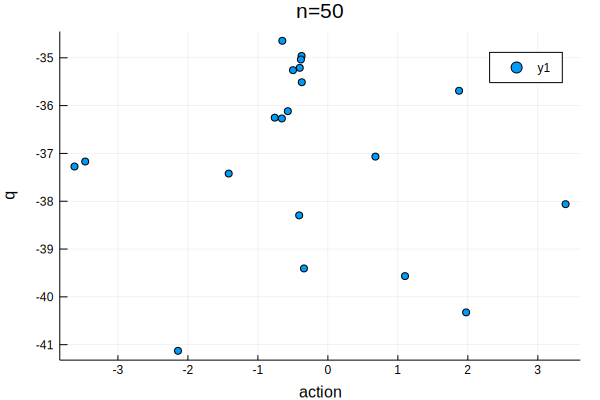

In [12]:
plot(observer, 50)

In [10]:
animate(observer; fps=4)

INFO: Saved animation to /Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif


Plots.AnimatedGif("/Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif")

In [11]:
observer.ys[5]

5-element Array{Float64,1}:
 -37.0664
 -37.169 
 -38.0613
 -37.4216
 -33.4795